In [4]:
!wget https://www.ers.usda.gov/webdocs/DataFiles/53736/FoodImports.csv?v=6638 -O FoodImports.csv

--2024-07-05 16:42:03--  https://www.ers.usda.gov/webdocs/DataFiles/53736/FoodImports.csv?v=6638
Resolving www.ers.usda.gov (www.ers.usda.gov)... 20.141.137.224
Connecting to www.ers.usda.gov (www.ers.usda.gov)|20.141.137.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1327062 (1.3M) [application/octet-stream]
Saving to: ‘FoodImports.csv’

FoodImports.csv     100%[===================>]   1.26M  3.68MB/s    in 0.3s    

2024-07-05 16:42:04 (3.68 MB/s) - ‘FoodImports.csv’ saved [1327062/1327062]



In [5]:
!ls  -l

total 2608
-rw-rw-r-- 1 sseltser sseltser     337 Jul  5 16:40  analyze_us_food_imports.ipynb
-rw-rw-r-- 1 sseltser sseltser 1327062 Apr 10 14:50  FoodImports.csv
-rw-rw-r-- 1 sseltser sseltser 1327062 Apr 10 14:50 'FoodImports.csv?v=6638'
-rw-rw-r-- 1 sseltser sseltser       0 Jul  5 16:01  __init__.py
-rw-rw-r-- 1 sseltser sseltser    1599 Jul  5 16:01  main.py
-rw-rw-r-- 1 sseltser sseltser      97 Jul  5 16:01  task-info.yaml
-rw-rw-r-- 1 sseltser sseltser    1753 Jul  5 16:01  task.md


In [8]:
import pandas as pd
us_imports = pd.read_csv("FoodImports.csv")

In [26]:
us_imports[us_imports["Country"] == "BENIN"]["Commodity"].unique()

array(['Cashew nuts'], dtype=object)

<Axes: xlabel='YearNum'>

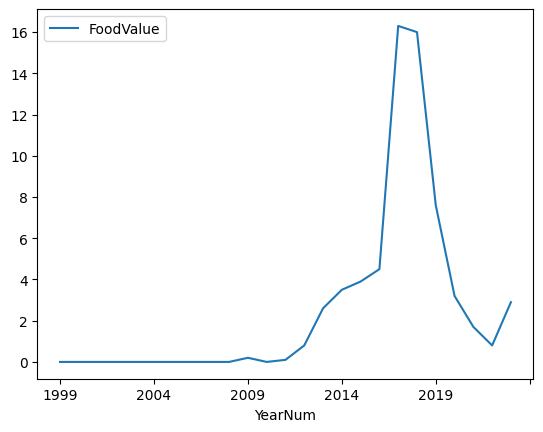

In [13]:
# what does Benin export to US
us_imports[us_imports["Country"] == "BENIN"].plot(y="FoodValue",x="YearNum")

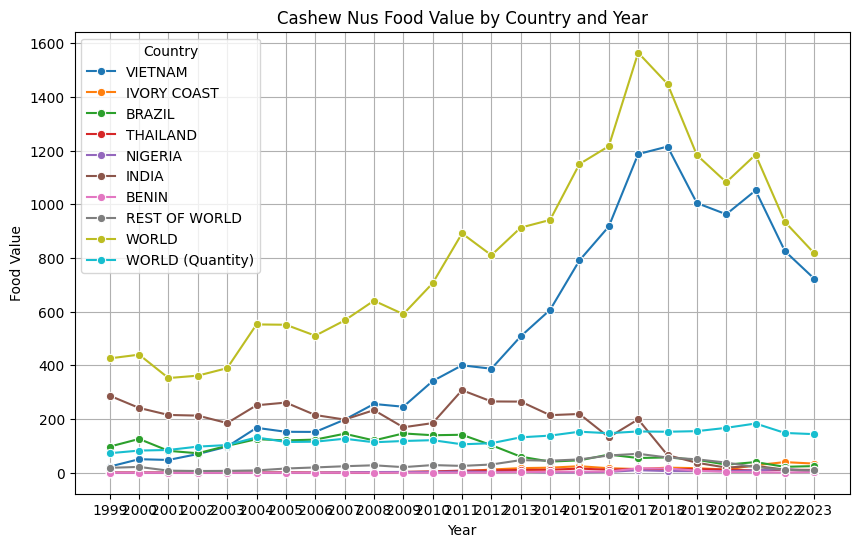

In [27]:
# how does Benin stands against other countries
import seaborn as sns
import matplotlib.pyplot as plt
nuts = us_imports[us_imports["Commodity"] == "Cashew nuts"]
plt.figure(figsize=(10, 6))
sns.lineplot(data=nuts, x='YearNum', y='FoodValue', hue='Country', marker='o')

plt.title('Cashew Nus Food Value by Country and Year')
plt.xlabel('Year')
plt.ylabel('Food Value')
plt.legend(title='Country')
plt.grid(True)
plt.show()

In [21]:
nuts

,Commodity,Country,UOM,Category,SubCategory,RowNumber,YearNum,FoodValue


In [31]:
us_imports[us_imports["Commodity"].str.contains("nuts")]["Commodity"].unique()


array(['Total nuts', 'Tree nuts', 'Cashew nuts', 'Prepared tree nuts',
       'Ground nuts'], dtype=object)

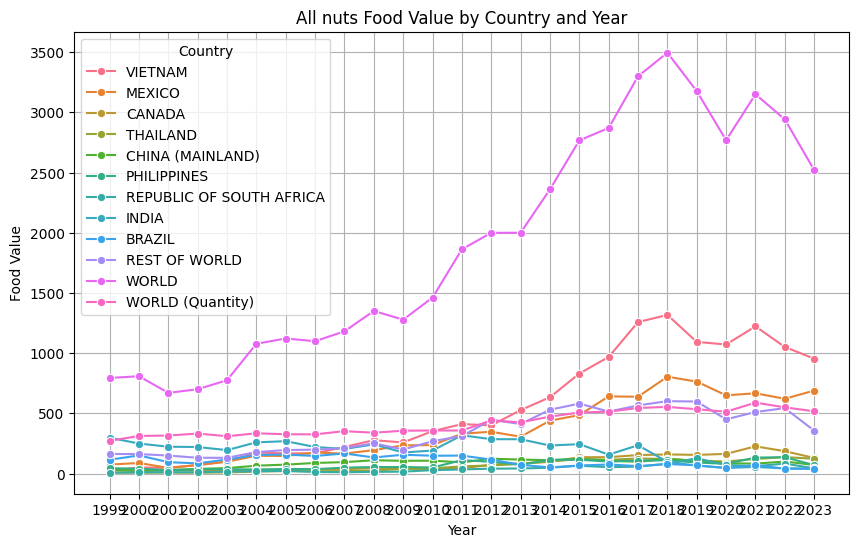

In [32]:
# how does nuts market looks overall through time
import seaborn as sns
import matplotlib.pyplot as plt
total_nuts = us_imports[us_imports["Commodity"] == "Total nuts"]
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_nuts, x='YearNum', y='FoodValue', hue='Country', marker='o')

plt.title('All nuts Food Value by Country and Year')
plt.xlabel('Year')
plt.ylabel('Food Value')
plt.legend(title='Country')
plt.grid(True)
plt.show()

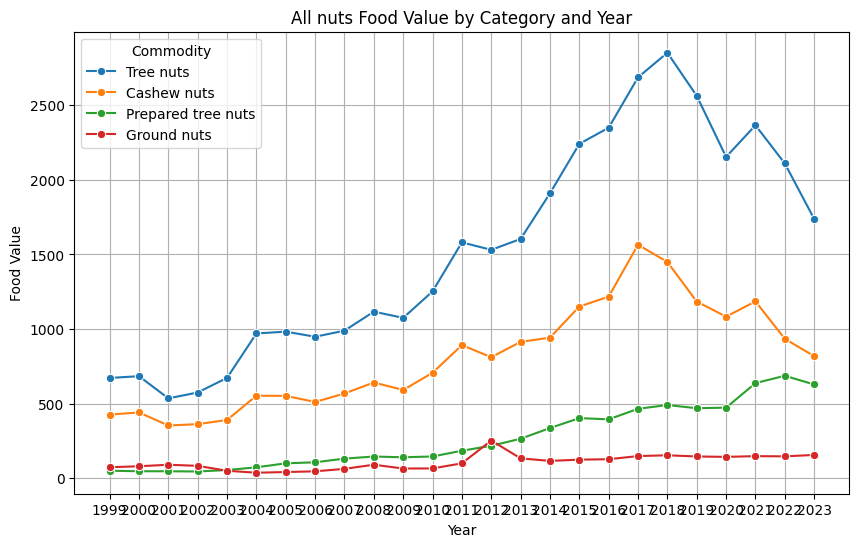

In [34]:
# how does nuts market looks overall through time
import seaborn as sns
import matplotlib.pyplot as plt
nuts = us_imports[us_imports["Commodity"].str.contains('Tree nuts|Cashew nuts|Prepared tree nuts|Ground nuts',regex=True)]
world_nuts = nuts[nuts["Country"] == "WORLD"]
plt.figure(figsize=(10, 6))
sns.lineplot(data=world_nuts, x='YearNum', y='FoodValue', hue='Commodity', marker='o')

plt.title('All nuts Food Value by Category and Year')
plt.xlabel('Year')
plt.ylabel('Food Value')
plt.legend(title='Commodity')
plt.grid(True)
plt.show()

In [37]:
us_imports["Commodity"].unique()

array(['Total live animals', 'Bovine animals, live', 'Swine, live',
       'Sheep and goats, live', 'Live poultry', 'Bird eggs',
       'Total red meats, fresh and frozen', 'Fresh or chilled red meats',
       'Frozen red meats and parts', 'Fowl and other meats',
       'Prepared meats', 'Total fish and shellfish',
       'Whole fish--fresh, chilled, or frozen', 'Fish fillets and mince',
       'Shellfish, fresh or frozen', 'Prepared fish and shellfish',
       'Total vegetables and preparations', 'Fresh vegetables',
       'Frozen vegetables', 'Dried vegetables',
       'Prepared or preserved vegetables', 'Total dairy products',
       'Cheese, fresh or processed', 'Yogurt, buttermilk, or whey',
       'Milk and cream', 'Butter or spreads',
       'Total fruit and preparations', 'Fresh or chilled fruit',
       'Bananas and plantains', 'Frozen fruit',
       'Dried, prepared or preserved fruit', 'Fruit juices', 'Total nuts',
       'Tree nuts', 'Cashew nuts', 'Prepared tree nuts', 'Gr

In [73]:
# only exports in dollars for entire world and no subcategries
world_imports = us_imports[(us_imports["Country"] == "WORLD") & (us_imports["UOM"] == "Million $") & (us_imports["SubCategory"] == "Foods")]
# filter totals out
orld_imports = world_imports[~world_imports["Commodity"].str.contains("Total")]
world_imports_23 = world_imports[world_imports["YearNum"] == "2023"]

world_imports_23.sort_values(by="FoodValue",ascending=False)[:10]

,Commodity,Country,UOM,Category,SubCategory,RowNumber,YearNum,FoodValue
17911,Fruits,WORLD,Million $,Food dollars,Foods,7,2023,27645.5
17908,Fish and shellfish,WORLD,Million $,Food dollars,Foods,4,2023,24851.9
17914,Grains,WORLD,Million $,Food dollars,Foods,10,2023,19827.0
17910,Vegetables,WORLD,Million $,Food dollars,Foods,6,2023,19799.0
17918,Other edible products,WORLD,Million $,Food dollars,Foods,14,2023,19407.1
17473,Fresh or chilled fruit,WORLD,Million $,Fruits,Foods,25,2023,18987.5
17919,Beverages,WORLD,Million $,Food dollars,Foods,15,2023,17920.2
17671,Cereal and bakery foods,WORLD,Million $,Grains,Foods,55,2023,14228.5
17907,Meats,WORLD,Million $,Food dollars,Foods,3,2023,13688.2
17915,Vegetable oils,WORLD,Million $,Food dollars,Foods,11,2023,12758.7


<Axes: ylabel='Commodity'>

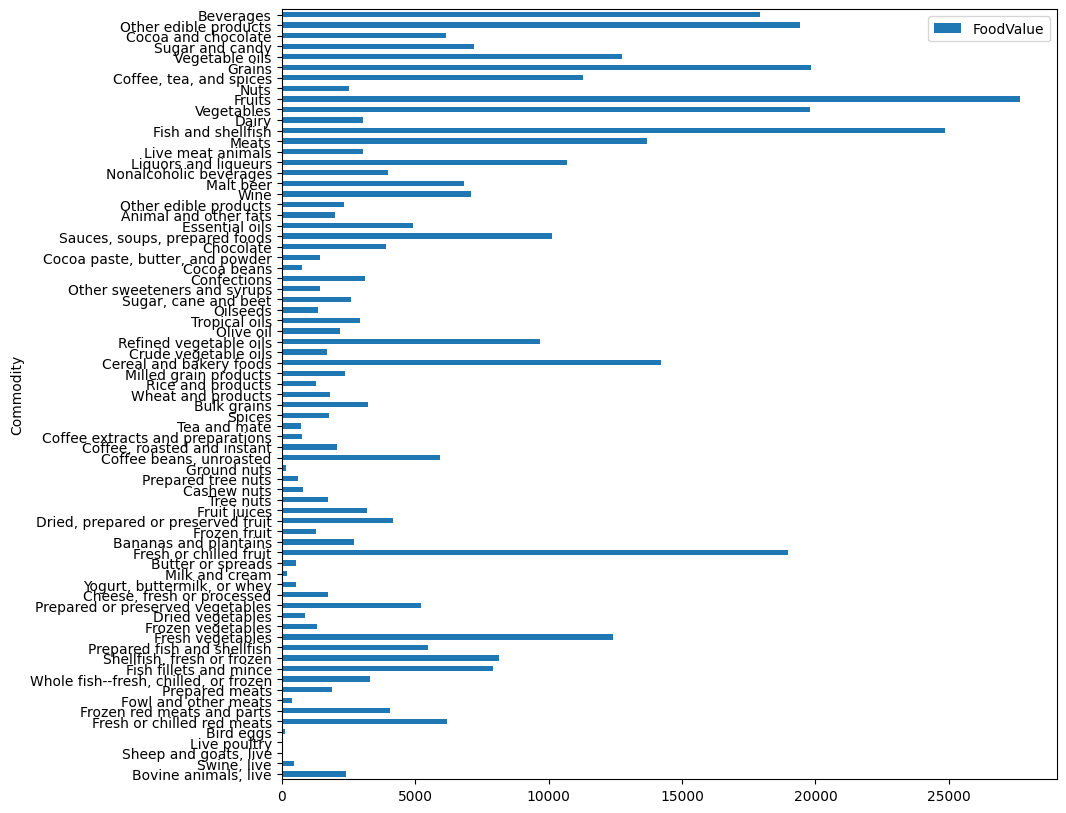

In [76]:
world_imports_23.plot.barh(y="FoodValue",x="Commodity",figsize=(10,10))


In [43]:
world_imports["YearNum"].unique()

array(['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'means10years', 'means'], dtype=object)